In [2]:
from time import time
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline  

# Homework 2

### 1. Implement the class `Stacks` and all its methods using singly linked lists. Analyze the runtime and memory complexity, and compare with what we studied in class

In [3]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        """
        Head Node initialization
        Preset: head_node = None
        """

        self.head_node = head_node

    def list_traversed(self):
        """
        List Traversed
        Print all the sigle linked list
        """
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node
    
    def insert_head(self, new_node):
        """
        Insert Head
        Inserts a node in the first place of the list
        """
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null 
        new_node.set_next_node(self.head_node)
        self.head_node = new_node
        
    def insert_tail(self, new_node):
        """
        Insert Tail
        Inserts a node at the end of the list where the node.next_node = None.
        """
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null 
        node = self.head_node
        prev = self.head_node
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)
        
    def insert_middle(self, new_node, value):
        """
        Insert Middle
        Inserts a node at next node of a specific value at the list.
        If not found -> insert_tail()
        """
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        #Changed case not val found
        while node:
            if node.val == value :  #Prevents None has no attribute 'val'
                break
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete_head(self):
        """
        Delete head
        Deletes first node of the list.
        If None -> pass
        """
        #delete value
        # A -> B -> C -> None
        # B -> C -> None
        node = self.head_node
        self.head_node = node.next_node
        node.next_node = None

    def delete_tail(self):
        """
        Delete tail
        Deletes last node of the list.
        """
        #delete value
        # A -> B -> C -> None
        # A -> B -> None
        node = self.head_node
        prev = self.head_node
        while node.next_node:
            prev = node
            node = node.next_node
        prev.set_next_node(None)


    def delete(self,value):
        """
        Delete
        Deletes a node at a specific value of the list.
        If not found -> pass
        If firts -> Changes the head node
        """
        #delete value
        # A -> B -> C -> None
        # A -> C -> None
        node = self.head_node
        prev = None
        while node:
            if node.val == value :
                break
            prev = node
            node = node.next_node
        if node:
            if not prev:    #Prevent head node error. None has no attribute 'set_next_node'
                self.head_node = node.next_node
                node.next_node = None
            else:
                prev.set_next_node(node.next_node)
                node.next_node = None


In [4]:
class Stack:
    """
    Implementation of the stack data structure using single linked list
    """
    def __init__(self, n):
        self.stack = Singly_linked_list(Node(None))
        self.n = n      
        self.l = 0
    
    def push(self, item):
        if self.l != self.n :
            self.stack.insert_head(Node(item))
            self.l += 1
        else:
            raise ValueError("No more capacity")

    def pop(self):
        if self.l > 0:
            #print(self.stack.head_node.val)
            self.stack.delete_head()
            self.l -= 1    

    def top(self):
        return self.stack.head_node.val

    def full(self):
        return self.l == self.n
    
    def empty(self):
        return self.l == 0
    
    def size(self):
        return self.l

In [5]:
S = Stack(10)

S.push(1)
S.push(2)
S.push(4)
S.push(-1)

In [6]:
S.top()

-1

In [7]:
S.size()

4

In [8]:
S.pop()

In [9]:
S.full()

False

In [10]:
S.empty()

False

La complejidad de la clase stack se analiza a continuación:
* Push: 
    * Tiene complejidad en runtime $O(1)$ porque el método insert_head() de la clase singly linked list tiene una complejidad constante sin ningun lazo.
    * Tiene complejidad en memoria $O(1)$ porque usa valor constante en memoria y no por aumentar el tamaño del stack, la memoria aumenta.
* Pop: 
    * $O(1)$ porque el método delete_head() de la clase single 
    linked list tiene una complejidad constante sin ningun lazo.
    * Tiene complejidad en memoria $O(1)$ porque delete_head usa valor constante en memoria y no por aumentar el tamaño del stack, la memoria aumenta.
* Top:
    * $O(1)$ porque solo imprime el valor del primer nodo de la lista y eso no depende del tamaño de la misma. Complejidad constante.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee una variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Full: 
    * $O(1)$ porque solo compara si self.l == self.n para que el stack esté lleno.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Empty: 
    * $O(1)$ porque solo compara si self.l = 0
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Size: 
    * $O(1)$ porque solo imprime el valor de self.l
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo retorna una variable y no por aumentar el tamaño del stack, la memoria aumenta.

Comparado con la implementación realizada en clase, se puede notar que usar singly_linked_list es igual de eficiente que al usar arreglos. Ya que en todos los casos la complejidad de las funciones de stack es $O(1)$

### 2. Write a method part of the linked list class that will reverse the linked list. Your implementation should visit each node in the list only one time, and should use $O(1)$ of extra memory.


> For example, if the list is:

> A -> B -> C -> D -> null

> The method must return:

> D -> C -> B -> A -> null


In [11]:
class Singly_linked_list(Singly_linked_list):
    def reverse(self):
        prev_val = self.head_node.val
        node =self.head_node.next_node
        res = Singly_linked_list(Node(prev_val))
        while node:
            prev_val = node.val
            res.insert_head(Node(prev_val))
            node = node.next_node 
            self.delete_head()  
        self.delete_head()         
        self.head_node = res.head_node
        

In [12]:
N1 = Node("A")
N2 = Node("B")
N3 = Node("C")
N4 = Node("D")
N1.set_next_node(N2)
N2.set_next_node(N3)
N3.set_next_node(N4)

L1 = Singly_linked_list(N1)

L1.list_traversed()
print("")
L1.reverse()
L1.list_traversed()


A
B
C
D

D
C
B
A


### 3. Implement the class Queue using stacks. 

> a. Analyze the runtime and memory complexity, and compare with what we implemented in class.

> b. Implement a few test cases that would allow you to measure the difference in runtime of the `dequeue` method. (Hint: what is the worst case, so that dequeue of the stack implementation is greater than the implementation we did in class?)

In [13]:
class Queue():
    def __init__(self,n):
        self.l = 0
        self.n = n
        self.queue = Stack(n)

    def enqueue(self,item):
        if self.l == self.n:
            raise ValueError("No more capacity")
        self.queue.push(item)
        self.l += 1

    def dequeue(self):
        if self.l != 0:
            temp_1 = Stack(self.n)
            size_stack = self.queue.l

            while size_stack > 1:
                temp_1.push(self.queue.top())
                self.queue.pop()
                size_stack -= 1
            #print(self.queue.top())
            self.queue.pop()

            while temp_1.size() > 0:
                self.queue.push(temp_1.top())
                temp_1.pop()
            self.l -= 1

    def first(self):
        return self.queue.top()
    
    def full(self):
        return self.l == self.n
    
    def empty(self):
        return self.l == 0
    
    def size(self):
        return self.l

In [14]:
q = Queue(10)
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)

In [15]:
q.dequeue()


La complejidad de la clase Queue se analiza a continuación:
* Enqueue: 
    * Tiene complejidad en runtime $O(1)$ porque el método push() de la clase stack tiene complejidad $O(1)$.
    * Tiene complejidad en memoria $O(1)$ porque usa valor constante en memoria igual a los $n$ datos admitidos, más variables adicionales. La memoria no aumenta durante la ejecución.
* Dequeue: 
    * $O(n)$ porque el método push() y pop() de Stack, tienen complejidad de $O(1)$ pero están dentro de dos lazos while que hacen que la complejidad todal sea lineal $2n$.Por lo tanto la complejidad de Dequeue es lineal $O(n)$.
    * Tiene complejidad en memoria $O(1)$ porque al mismo tiempo que se usa un valor en memoria extra para el stack temporal, se elimina el espacio de memoria en el stack principal. Por lo que el promedio de memoria utilizada permanece constante y no aumenta en memoria por aumentar el queue.
* First:
    * $O(1)$ porque solo imprime el valor top() del queue. Este método tiene complejidad constante.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee una variable y no por aumentar el tamaño del queue, la memoria aumenta.
* Full: 
    * $O(1)$ porque solo compara si self.l == self.n para que el stack esté lleno.
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Empty: 
    * $O(1)$ porque solo compara si self.l = 0
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo lee y compara dos variable y no por aumentar el tamaño del stack, la memoria aumenta.
* Size: 
    * $O(1)$ porque solo imprime el valor de self.l
    * Tiene complejidad en memoria $O(1)$ porque la funcion solo retorna una variable y no por aumentar el tamaño del stack, la memoria aumenta.

Comparando con la implementación de Queue hecha con arrays, se puede ver que usar stacks es igual de eficiente. Comparado con otras estructuras de datos, esta es diferente en dequeue porque se debe manipular de varias formas al stack para obtener el valor inicial y poderlo borrar.

* B)

In [16]:
#Decorador para calcular el tiempo de ejecucion de una funcion

from time import sleep

def calculo_tiempo(funcion):
    """
        En este decorador se crea un arreglo de dos dimensiones,
        la primera con el resultado de la funcion y el segundo
        con el tiempo de ejecucion de la misma.
    """

    #Se usa el sleep de 1s porque sino el resultado que devuelve es 0 por algun proceso interno de la computadora.
    def wrapper(*args, **kwargs):
        result = [0,0]    #Declaramos el arreglo
        start = 10**6*time()    #Se toma el tiempo inicial
        sleep(1)    #Espera de 1s
        result[0] = funcion(*args, **kwargs)    #Se ejecuta la función
        result[1] = 10**6*time() - start - 10**6    #Se toma la diferencia de tiempos menos 1s
        return result  
    return wrapper

In [17]:
class Queue(Queue):

    @calculo_tiempo
    def dequeue(self):
        if self.l != 0:
            temp_1 = Stack(self.n)
            size_stack = self.queue.l

            while size_stack > 1:
                temp_1.push(self.queue.top())
                self.queue.pop()
                size_stack -= 1
            #print(self.queue.top())
            self.queue.pop()

            while temp_1.size() > 0:
                self.queue.push(temp_1.top())
                temp_1.pop()
            self.l -= 1


In [18]:
n = np.array([1,10,10**2,10**3,10**4,10**5,10**6,10**7])
T1 = np.empty(len(n)) 

for j in range(0,len(n)):
    Q = Queue(n[j])
    for i in range(1,n[j]):
        Q.enqueue(i)
    T1[j] = Q.dequeue()[1]

print (T1)

[2.24600000e+03 7.05525000e+03 9.30200000e+03 5.34850000e+03
 3.17842500e+04 2.71114750e+05 2.73960725e+06 2.85116225e+07]


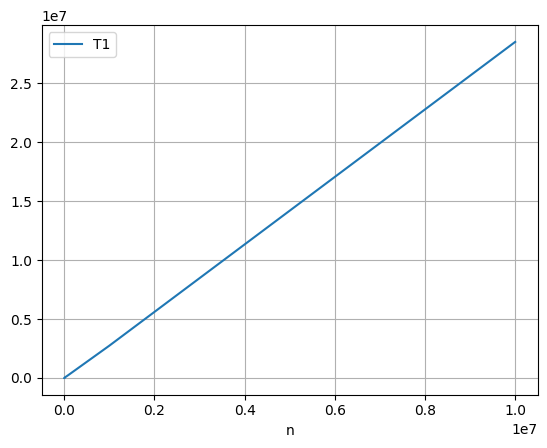

In [19]:
plot1 = pd.DataFrame()
plot1['T1'] = T1    #A los resultados se los incluye en un DataFrame para visualizarlos
plot1['n'] = n

#Plot
plot1.plot(x='n', y= ['T1'])
plt.grid()

Como se puede observar, la linea de tendencia es lineal como se predijo por lo tanto la complejidad de Dequeue es $O(n)$, el máximo de complejidad se alcanza cuando el stack interno se encuentra lleno ya que se debe hacer el paso de todas las variables a otro stack temporal. En ese caso la complejidad es $2n$. Por otro lado, la implementación de la clase tiene una complejidad $n$, de esta forma, esta implementación en todos los casos es mejor que la realizada con Stacks. Finalmente, para el método dequeue, es mejor el uso de arreglos como estructura de dato antes que stacks. Esto se debe a la complejidad e incoapacidad al solo poder manipular el valor más externo de la fila.

### 4. Complete the PriorityQueue class, so that when we call `dequeue`, the element with the highest priority will be returned. Analyze the complexity of runtime and memory of the `enqueue` and `dequeue` methods.

A = [4, 2, 7, 5, 9]  # O(n^2)

B = [1, 3, 4, 5]
insert 2 in B, such that B is still sorted 
Not O(n^2)